In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-talk')
from sklearn.linear_model import LinearRegression

In [4]:
df_GBP = pd.read_csv("exchangeGBP.csv", index_col='YYYY/MM/DD', parse_dates=True)

data = pd.read_csv('exchangeGBP.csv', parse_dates=True)
#shift+tab on oarse_date to see what it means
df_GBP.head()
data.head()

,YYYY/MM/DD,GBP/EUR
0,04/01/2010,0.89513
1,05/01/2010,0.89966
2,06/01/2010,0.89934
3,07/01/2010,0.89963
4,08/01/2010,0.89771


In [5]:
#data.info()
data = data.dropna(how='all')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 2 columns):
YYYY/MM/DD    500 non-null object
GBP/EUR       500 non-null float64
dtypes: float64(1), object(1)
memory usage: 11.7+ KB


In [6]:
#x = df_GBP['YYYY/MM/DD']
y = data['GBP/EUR']
x = np.arange(0, 500).reshape(-1, 1)
#pd.to_numeric(y, downcast='float')
#data['GBP/EUR'] = data[['GBP/EUR']].astype(int)

Text(0,0.5,'exchange rate')

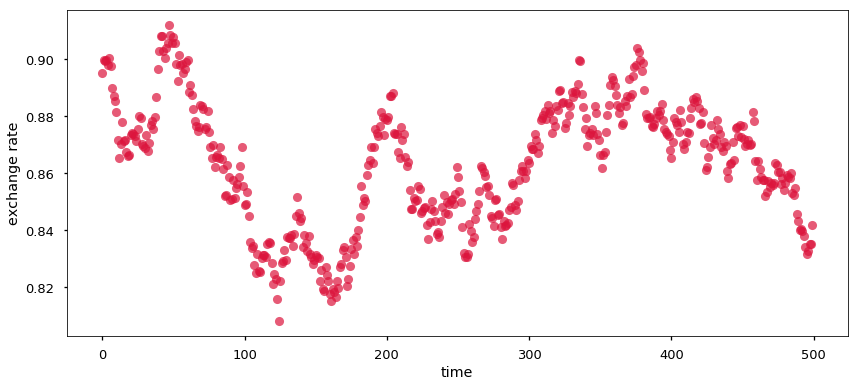

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(y, 'o', color='crimson', alpha=0.7)
ax.set_xlabel('time')
ax.set_ylabel('exchange rate')

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
model.fit(x, y.values)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

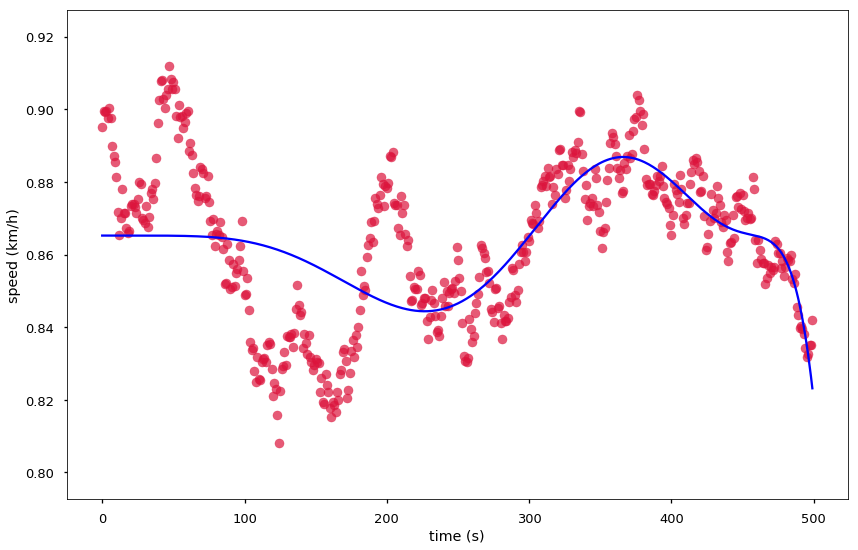

In [9]:
y_fit = model.predict(x)

fig, ax = plt.subplots(figsize=(14, 9))
ax.scatter(x, y, color='crimson', alpha=0.7)
ax.plot(x, y_fit, 'b-')#color='navy')
ax.set_xlabel('time (s)')
ax.set_ylabel('speed (km/h)')
model

# #Is degree 10 correct amount for the function? We don't know
#This is a case where out model underfits the data, i.e. our model has not enough complexity to 
model the complexity we see. We can also say that our model has too much bias about how the data looks.

Let us try with a big degree, e.g. 100.

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=50, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

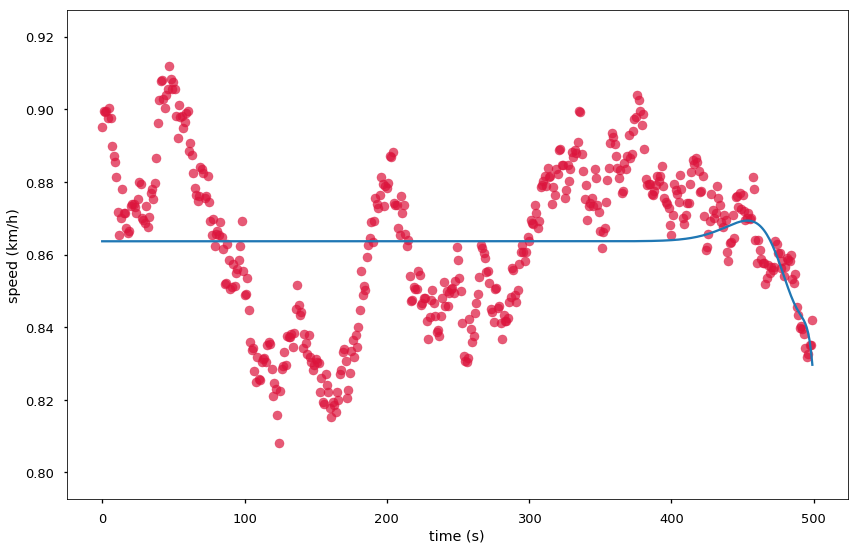

In [19]:
model = make_pipeline(PolynomialFeatures(degree=50), LinearRegression())
model.fit(x, y.values)
y_fit = model.predict(x)

fig, ax = plt.subplots(figsize=(14, 9))
ax.scatter(x, y, color='crimson', alpha=0.7)
ax.plot(x, y_fit, )#color='navy')
ax.set_xlabel('time (s)')
ax.set_ylabel('speed (km/h)')
model

This is a typical overfit of the model. So we need to find the correct polynomial degree of our function
The method to do this is a grid search algorithm, which will perform the training and cross-validating of our model for all hyperparameter values given to it.

In [23]:
from sklearn.model_selection import GridSearchCV

model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
grid = GridSearchCV(model,
                    {'polynomialfeatures__degree': list(range(5, 101))},
                    cv=5)
grid

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

(Pipeline(memory=None,
      steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
 0.8894313547835384,
 array([ 0.00000000e+00,  7.15150234e-05, -8.74445445e-06,  5.76822639e-08,
        -1.28093836e-10,  9.27577628e-14]))

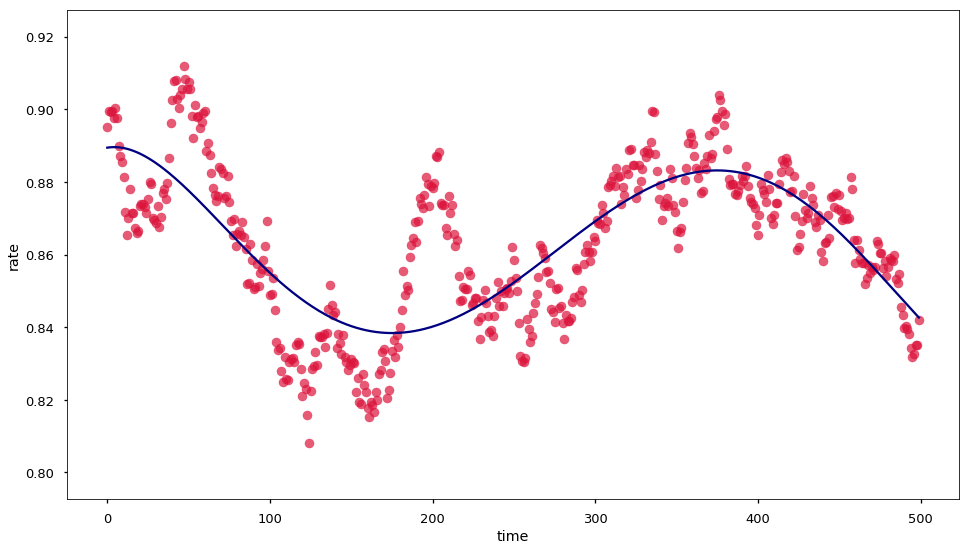

In [24]:
grid.fit(x, y)

best = grid.best_estimator_
#xfit = np.linspace(0, 30, 3000)
yfit = best.predict(x)
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, y, color='crimson', alpha=0.7)
ax.plot(x, yfit, color='navy')
ax.set(xlabel='time', ylabel='rate')
best, best.named_steps.linearregression.intercept_, best.named_steps.linearregression.coef_

In [25]:
grid.best_score_

-18.520248375635624

This is not a good regression either. So what went wrong? 
Let's try Regularisation techniques of sklearn. Ridge and Lasso.

For degrees more than 50, ridge model threw and error:
ValueError: array must not contain infs or NaNs
np.isnan(x).any()
np.isnan(y).any()
np.isinf(x).any()
np.isinf(y).any()
all came back false, so I had to reduce the degrees to 50

(Pipeline(memory=None,
      steps=[('polynomialfeatures', PolynomialFeatures(degree=50, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=300000,
    normalize=False, random_state=None, solver='auto', tol=0.01))]),
 0.867905789109157,
 array([ 1.42070009e-121,  8.49080722e-121, -8.03867188e-121,
        -1.23344021e-121, -4.87076879e-121, -6.74553769e-121,
        -6.19074025e-122,  1.14163067e-120, -9.13607686e-122,
        -5.36343591e-121,  2.98658832e-121,  4.82198336e-121,
         2.03320022e-121, -1.24121820e-121, -1.87463648e-122,
        -1.44543448e-121, -5.35380529e-121,  1.42680797e-121,
         7.99556132e-122,  6.34973574e-122,  6.67043661e-122,
        -8.42530225e-122,  8.70773037e-122, -4.15653066e-122,
         7.66102140e-122,  9.82093005e-123,  1.35976506e-121,
        -3.27506718e-121, -1.98407908e-121, -7.60617799e-122,
        -6.48975389e-122,  2.82507369e-121,  2.70382914e-121,
        -1.4852011

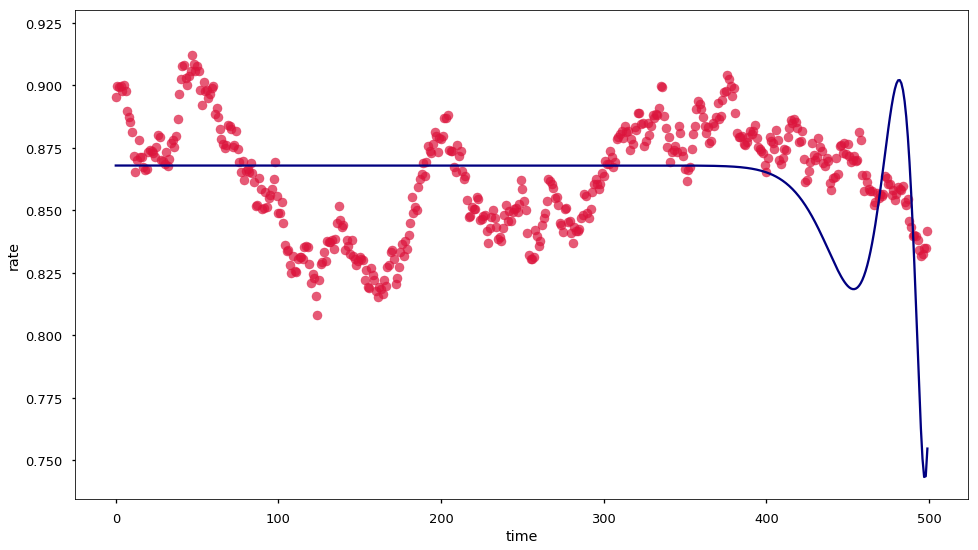

In [46]:
from sklearn.linear_model import Ridge, Lasso
#ridge
model = make_pipeline(PolynomialFeatures(degree=50), Ridge(alpha=5.0, tol=0.01, max_iter=300000))
# model = make_pipeline(PolynomialFeatures(degree=100), Lasso(alpha=10.0, tol=0.01, max_iter=300000))
model.fit(x, y)
#xfit = np.linspace(0, 30, 3000)
yfit = model.predict(x)
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, y, color='crimson', alpha=0.7)
ax.plot(x, yfit, color='navy')
ax.set(xlabel='time', ylabel='rate')
model
model.named_steps.ridge.intercept_
model.named_steps.ridge.coef_

/Users/buketkonuk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:477: RuntimeWarning: overflow encountered in square
  positive)
/Users/buketkonuk/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/Users/buketkonuk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=100, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=1000000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.01, warm_start=False))])

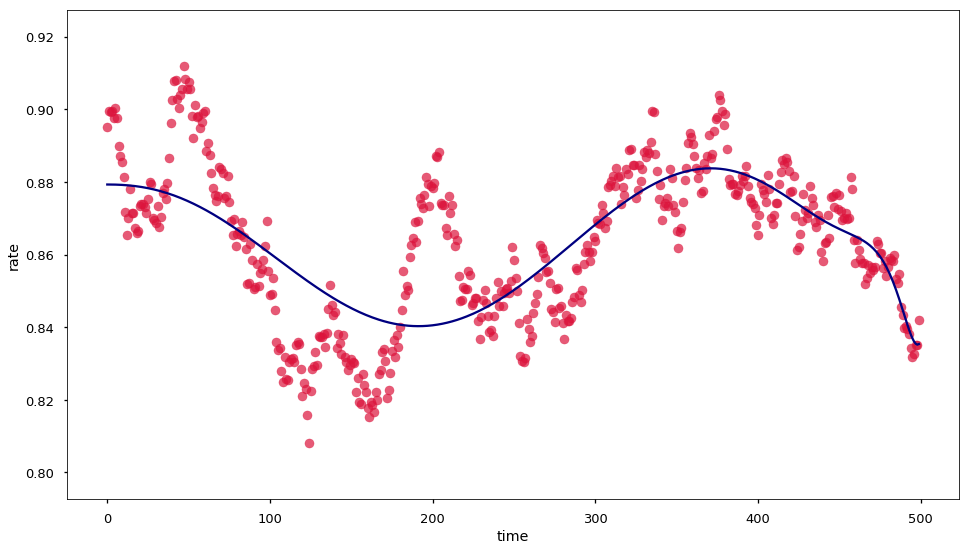

In [45]:
# Lasso
# which alpha to pick for Lasso and how many iteration?
model = make_pipeline(PolynomialFeatures(degree=100), Lasso(alpha=5.0, tol=0.01, max_iter=1000000))
model.fit(x, y)
#xfit = np.linspace(0, 30, 3000)
yfit = model.predict(x)
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, y, color='crimson', alpha=0.7)
ax.plot(x, yfit, color='navy')
ax.set(xlabel='time', ylabel='rate')
model
# model.named_steps.lasso.intercept_
# model.named_steps.lasso.coef_

Neither regularisation technique produced good results, as alast stpe we should try and tune the alpha for Ridge and Lasso as well as the polynomial features

In [48]:
import warnings
from sklearn.exceptions import ConvergenceWarning
# clear output of warnings, we will root out bad fits with crossvalidation
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)

model = make_pipeline(PolynomialFeatures(degree=5), Ridge(alpha=1.0, tol=0.1, max_iter=3000))
grid = GridSearchCV(model,
                    {'polynomialfeatures__degree': list(range(5, 21)),
                     'ridge__alpha': [0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 100, 200, 300, 500]},
                    cv=5)
grid.fit(x, y)
grid.best_estimator_
grid.best_score_

-13.421192583484498

Still the model is not good